# Quantifying the World - Fall 2021
## Case Study 2 | Diabetes 
## Grant Bourzikas

## Abstract
The problem that has been brought to our data science team comes from a Diabetes study that consists of over 130 medical hospitals. The goal of the study is to develop a Logistic Regression algorithm to predict whether a patient would be readmitted in 30 days after their hospital stay.    The readmitted feature is the independent variable (y) that will be used predict the data to determine the whether the patient will return back to the hospital within 30 days. The dataset that was provided includes over 101,766 records with over 50 Discrete and Categorical Features.


## Introduction
The problem that has been brought to our data science team comes from a Diabetes study that consists of over 130 medical hospitals. The goal of the study is to develop a Logistic Regression algorithm to predict whether a patient would be readmitted in 30 days after their hospital stay.    The readmitted feature is the independent variable (y) that will be used predict the data to determine the whether the patient will return back to the hospital within 30 days. The dataset that was provided includes over 101,766 records with over 50 Discrete and Categorical Features.



In [102]:
print("Diabetes Dataset - Rows:", diabetic.shape[0], "3Columns/Features", diabetic.shape[0])

Diabetes Dataset - Rows: 101766 3Columns/Features 101766


Two data files were received that contained the diabetes data.  The first file contained discrete and categorical dataset around features captured in the study and the second data file had a ID mapping defintions for admission type, discharge type, and  admission source.  

## Exploratory Data Analysis
After analyzing the data, many data features are missing or coded inconsistently that need to be updated or deleted.  Without addressing this problem, the models will not be inaccurate and will negatively affect the final predictions in regard to classification and accuracy. Reviewing each individual column, the data appears to be normally distributed after an analysis of histograms and pair plots, but can be skewed based on the feature.   Additionally, a full correlation of the dataset was reviewed and there were no highly correlated values (greater than 90%).


In [103]:
print("Number of Highly Correlated Features", len(correlated_features))

Number of Highly Correlated Features 0


## Addressing Missing Data
The next phase is to remediate the issues with missing data.  All improperly and inconsistent keyed in data that was unknown in the Race, Gender, Discharge Disposition, and Admission Source, was reclassified as not a number (NaN) in order to impute the data in a later section.  The second cleanup of the data is to address the formatting and readability of the Age, MaxGluSerum and A1Cresult columns. The last step is to drop columns that have a high frequency of values, upon manual inspection, less than 50 values of Yes or No, that do not have enough data differention.  While automated techniques are easier, it is good to understand the data and this analysis was done by manual inspection.

Additionally, an automated function, vs manual inspection, was used to eliminate high frequency columns.    The final step was to classify the data as discrete and categorical along with setting up the independent variable:
-	(y) – Binary Class for patients that do not return to hospital or patients that return to the hospital after 30 days vs patients that return to the hospital within 30 days,
-	(y_MC) - Multiclass classification for one-vs-rest variables for patients that do not return to the hospital vs. return to the hospital in less than 30 days vs.  return to the hospital greater than 30 days 

The third step in the process was to do convert categorical features into dummy variables to enrich the data when building the final algorithms.  In researching the data, all value counts with a “1” in Diag_1, Diag_2, and Diag_3 were eliminated because these were unique and isolated cases that only affected one patient.   Get Dummy’s was then used to extract all categorical features to numeric data and then a Standard Scaler was used on the Discrete Data to ensure the data was consistent.  This data was joined back into a dataframe and the data consisted of 101,766 Rows and 82 Columns/Features.  

The last step was to replace all NaN values with the K Nearest Neighbors (KNN) imputation algorithm to find the best values for each NAN value.  

In [104]:
print("Number of NaN Values Before KNN", dia.isnull().sum().sum())
print("Number of NaN Values After KNN", diabetes_DF.isnull().sum().sum())


Number of NaN Values Before KNN 22337
Number of NaN Values After KNN 0


## Data Bias
After researching hereditary effects of diabetes, gender, race, and age were kept in the data set because these features do help drive better accuracy in the models.  While this data could be biased based on Ethnicity, this data will be masked in the final datasets so the data cannot be used to profile patients (good or bad).

## Models
After the exploratory data analysis was performed, we develop the 2 logistic regression models on the diabetes clean dataset using two different independent variables for readmittance (y & y_MC). The following are the 2 models that were used:

1.	Logistic Regression  using binary classification for patients that do not return to the hospital & return to the hospital in greater than 30 days (0) and return to the hospital in less than 30 days (1).
2.	Logistic Regression  using multiclass classification for patients that do not return to the hospital (0) return to the hospital in less than 30 days (1) and return to the hospital in greater than 30 days (2)


## Results
### Model 1
For the logistic regression binary model, we were able to predict at an accuracy score of 89% to determine if the patient would not return to the hospital or return to the hospital in greater than 30 days (0) vs. return to the hospital in less than 30 days.  The algorism was optimized leveraging regularization strength (C Value) and the details are as follow:


In [107]:
print(classification_report(y, preds, target_names=['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.89      1.00      0.94     90409
    Readmitted       0.49      0.00      0.00     11357

      accuracy                           0.89    101766
     macro avg       0.69      0.50      0.47    101766
  weighted avg       0.84      0.89      0.84    101766



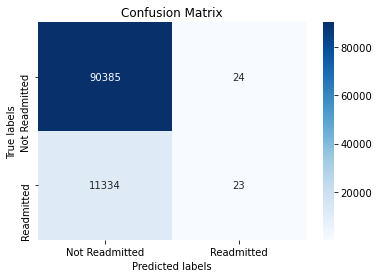

In [108]:
ax= plt.subplot()

cm0 = confusion_matrix(y, preds)
sns.heatmap(cm0, cmap="Blues", annot=True, fmt='d', ) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Readmitted', 'Readmitted']); ax.yaxis.set_ticklabels(['Not Readmitted', 'Readmitted']);


Reviewing the confusion matrix, we predicted 11,334 patients that would not be readmitted that resulted in the 11% inaccuracy.

## Model 2
For the logistic regression binary model, we were able to predict at an accuracy score of 57% determine if the patient would return to the hospital (0) vs. return to the hospital in less than 30 days (1) vs return to the hospital in greater than 30 days (2).  The algorism was optimized leveraging regularization strength (C Value) and the details are as follow:

In [109]:
print(classification_report(y_MC, preds_MC, target_names=['Not Readmitted', 'Readmitted > 30 Days', 'Readmitted < 30 Days']))

                      precision    recall  f1-score   support

      Not Readmitted       0.59      0.89      0.71     54864
Readmitted > 30 Days       0.49      0.25      0.33     35545
Readmitted < 30 Days       0.38      0.01      0.02     11357

            accuracy                           0.57    101766
           macro avg       0.49      0.38      0.35    101766
        weighted avg       0.53      0.57      0.50    101766



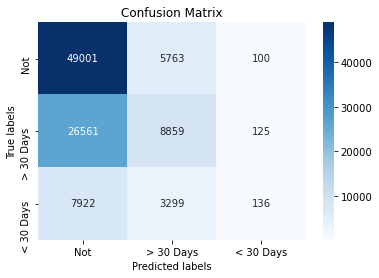

In [110]:
ax= plt.subplot()

cm_MC = confusion_matrix(y_MC, preds_MC)
sns.heatmap(cm_MC, cmap="Blues", annot=True, fmt='d', ax=ax) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not', '> 30 Days', '< 30 Days']); ax.yaxis.set_ticklabels(['Not', '> 30 Days', '< 30 Days']);


Reviewing the confusion matrix, the key is statistic is that the odel predicted that 7,922 patients would not be readdmitted which was 29% accurate for all patients that returned in 30 days.

## Conclusion
While the intent of the study was to identify whether we could predict if a patient would return back to the hospital in 30 days using multiple independent variables that included not return, returning in less than 30 days, and returning in greater than 30 days, the accuracy of this model was not reliable at 57% and we would not recommend using this methodology to predict whether the patient would return.  However, when we consolidated the patients that did not return with the patients that returned after 30 days and then compared this data to patients that return withing 30 days, we were able to develop a model that allowed us to predict at 89% accuracy.  We believe this is the best approach and best model to use moving forward because the hospitals are most concerned in predicting whether patients will return in 30 days due to various laws and regulations at a state and federal level and this model will help hospitals reduce the readmission rates under 30 days.


In [111]:
# Begin Code

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import altair as alt
from sklearn.metrics import classification_report, plot_confusion_matrix
from tqdm import tqdm


pd.set_option('display.max_colwidth', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.preprocessing import OneHotEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [59]:
# id_map = pd.read_csv('dataset_diabetes/IDs_mapping.csv')  
# print(id_map.shape)
diabetic = pd.read_csv('dataset_diabetes/diabetic_data.csv')  
print("Diabetes Dataset - Rows:", diabetic.shape[0], "3Columns/Features", diabetic.shape[0])



Diabetes Dataset - Rows: 101766 3Columns/Features 101766


In [54]:
diabetic.describe()


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [55]:
# Review Data Fields
for columns in diabetic:
    print(diabetic[columns].value_counts())

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-1

(array([10493., 16574., 16064., 20683., 10720.,  9958.,  7039.,  3438.,
         3346.,  3451.]),
 array([1.25220000e+04, 4.43979920e+07, 8.87834620e+07, 1.33168932e+08,
        1.77554402e+08, 2.21939872e+08, 2.66325342e+08, 3.10710812e+08,
        3.55096282e+08, 3.99481752e+08, 4.43867222e+08]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'encounter_id')

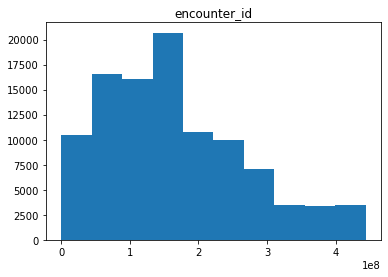

(array([20481., 19240., 16184., 11037., 17908., 12886.,  1594.,  1161.,
          429.,   846.]),
 array([1.35000000e+02, 1.89503834e+07, 3.79006318e+07, 5.68508802e+07,
        7.58011286e+07, 9.47513770e+07, 1.13701625e+08, 1.32651874e+08,
        1.51602122e+08, 1.70552371e+08, 1.89502619e+08]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'patient_nbr')

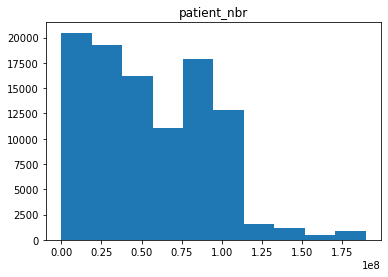

(array([76099.,     0., 19210.,     0.,  2273.,     0.,  1506.,     0.,
          641.,  2037.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'race')

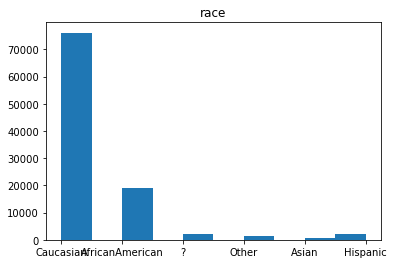

(array([5.4708e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.7055e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'gender')

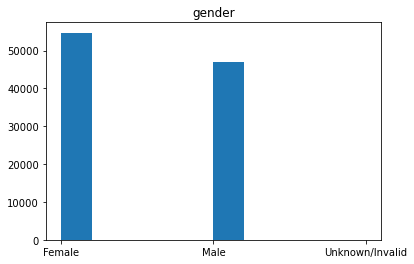

(array([  161.,   691.,  1657.,  3775.,  9685., 17256., 22483., 26068.,
        17197.,  2793.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'age')

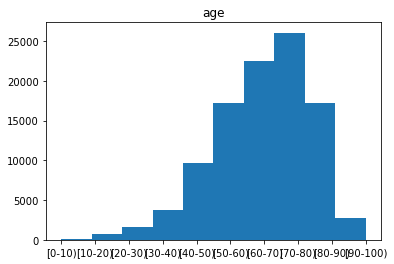

(array([9.8569e+04, 1.3360e+03, 8.9700e+02, 4.8000e+01, 6.2500e+02,
        9.7000e+01, 1.4500e+02, 1.1000e+01, 3.5000e+01, 3.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'weight')

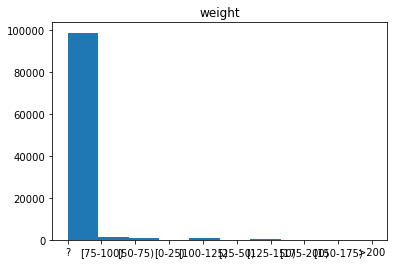

(array([5.3990e+04, 1.8480e+04, 1.8869e+04, 0.0000e+00, 1.0000e+01,
        4.7850e+03, 0.0000e+00, 5.2910e+03, 2.1000e+01, 3.2000e+02]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'admission_type_id')

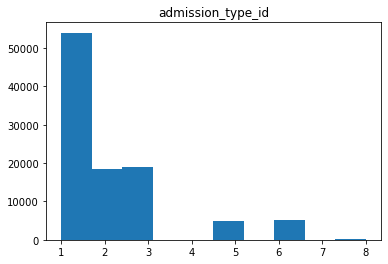

(array([76316., 14901.,   752.,  1648.,   774.,    88.,  3699.,  1995.,
         1449.,   144.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'discharge_disposition_id')

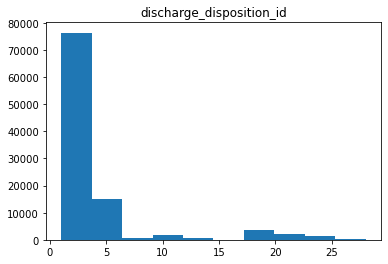

(array([3.0856e+04, 4.0420e+03, 5.9774e+04, 1.3300e+02, 2.0000e+00,
        3.0000e+00, 6.7810e+03, 1.6100e+02, 1.2000e+01, 2.0000e+00]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'admission_source_id')

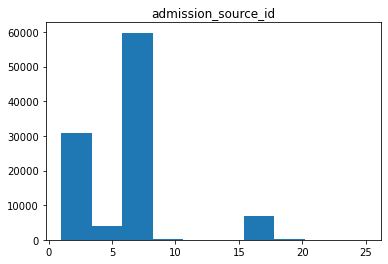

(array([31432., 17756., 13924., 17505.,  5859.,  4391.,  5344.,  1855.,
         1448.,  2252.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'time_in_hospital')

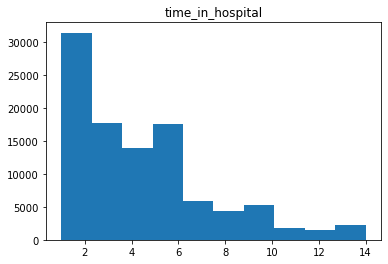

(array([72695.,  9806.,  7103.,  5007.,  2588.,  2486.,   146.,   727.,
         1128.,    80.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'payer_code')

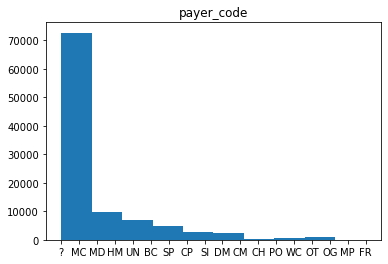

(array([82598., 13256.,  1380.,  1112.,   662.,   599.,    88.,   765.,
         1212.,    94.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'medical_specialty')

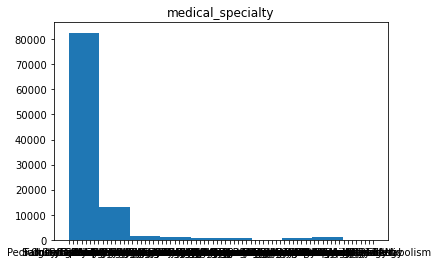

(array([1.0318e+04, 1.0141e+04, 2.1826e+04, 2.7814e+04, 2.0558e+04,
        8.8760e+03, 1.9150e+03, 2.9000e+02, 2.3000e+01, 5.0000e+00]),
 array([  1. ,  14.1,  27.2,  40.3,  53.4,  66.5,  79.6,  92.7, 105.8,
        118.9, 132. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'num_lab_procedures')

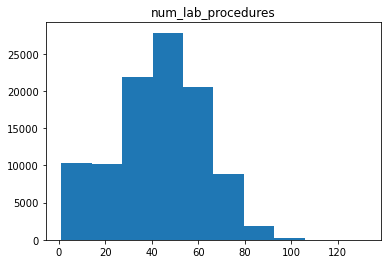

(array([46652., 20742.,     0., 12717.,     0.,  9443.,  4180.,     0.,
         3078.,  4954.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'num_procedures')

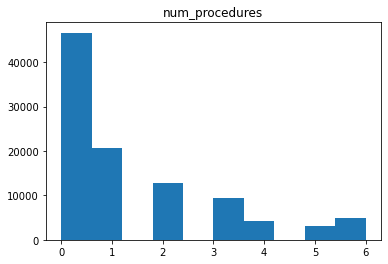

(array([1.5602e+04, 4.5073e+04, 2.7844e+04, 9.3450e+03, 2.5410e+03,
        8.1500e+02, 3.5500e+02, 1.4500e+02, 4.1000e+01, 5.0000e+00]),
 array([ 1.,  9., 17., 25., 33., 41., 49., 57., 65., 73., 81.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'num_medications')

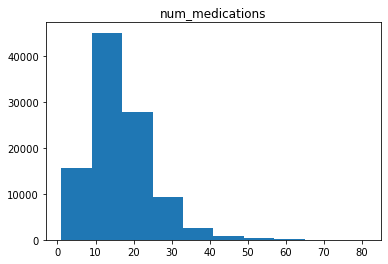

(array([1.00309e+05, 1.08900e+03, 2.12000e+02, 9.40000e+01, 2.30000e+01,
        1.90000e+01, 8.00000e+00, 2.00000e+00, 6.00000e+00, 4.00000e+00]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'number_outpatient')

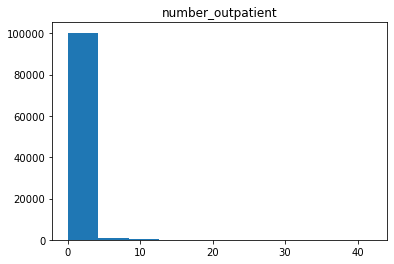

(array([1.0156e+05, 1.6800e+02, 2.6000e+01, 5.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. , 45.6, 53.2, 60.8, 68.4, 76. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'number_emergency')

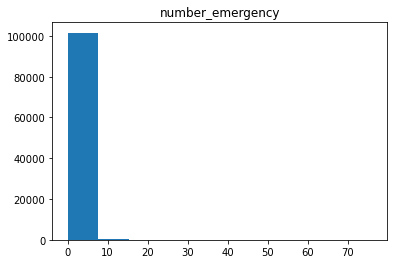

(array([9.4717e+04, 5.0330e+03, 1.2920e+03, 4.1900e+02, 1.7200e+02,
        8.3000e+01, 3.0000e+01, 1.5000e+01, 2.0000e+00, 3.0000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'number_inpatient')

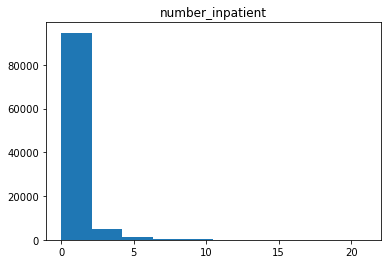

(array([64111., 20694.,  6828.,  4614.,  2348.,  1567.,   776.,   418.,
          234.,   176.]),
 array([  0. ,  71.6, 143.2, 214.8, 286.4, 358. , 429.6, 501.2, 572.8,
        644.4, 716. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'diag_1')

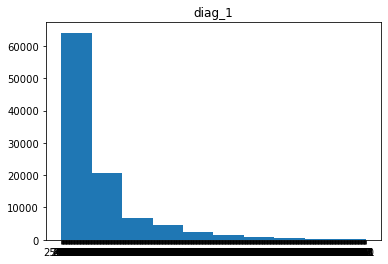

(array([74428., 14295.,  5202.,  3657.,  1580.,   912.,   665.,   455.,
          442.,   130.]),
 array([  0. ,  74.8, 149.6, 224.4, 299.2, 374. , 448.8, 523.6, 598.4,
        673.2, 748. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'diag_2')

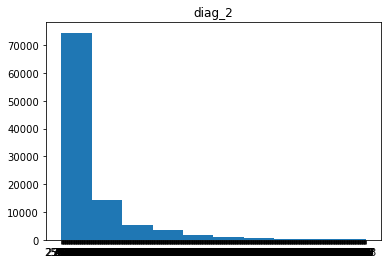

(array([70218., 15590.,  8451.,  2837.,  1972.,  1077.,   663.,   411.,
          396.,   151.]),
 array([  0. ,  78.9, 157.8, 236.7, 315.6, 394.5, 473.4, 552.3, 631.2,
        710.1, 789. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'diag_3')

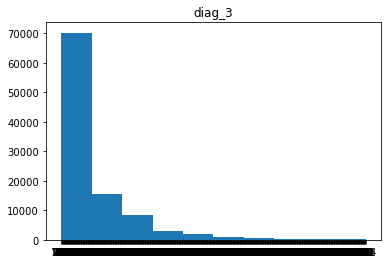

(array([1.2420e+03, 2.8350e+03, 1.6930e+04, 1.0161e+04, 2.1009e+04,
        4.9474e+04, 2.8000e+01, 9.0000e+00, 2.3000e+01, 5.5000e+01]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'number_diagnoses')

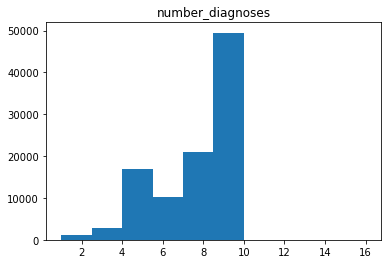

(array([96420.,     0.,     0.,  1264.,     0.,     0.,  2597.,     0.,
            0.,  1485.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'max_glu_serum')

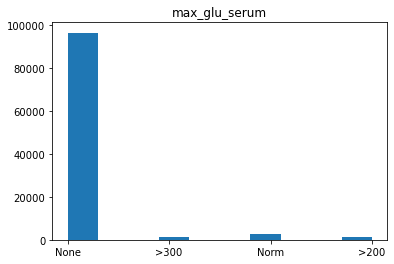

(array([84748.,     0.,     0.,  3812.,     0.,     0.,  8216.,     0.,
            0.,  4990.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'A1Cresult')

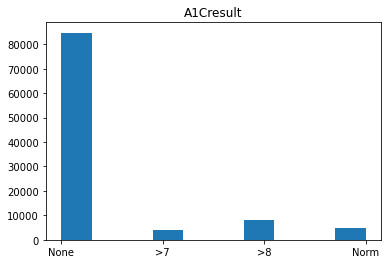

(array([81778.,     0.,     0., 18346.,     0.,     0.,  1067.,     0.,
            0.,   575.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'metformin')

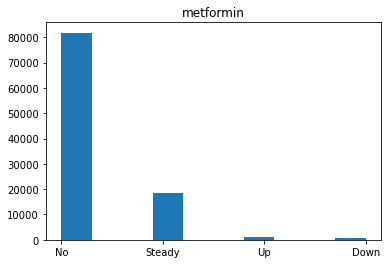

(array([1.00227e+05, 0.00000e+00, 0.00000e+00, 1.10000e+02, 0.00000e+00,
        0.00000e+00, 1.38400e+03, 0.00000e+00, 0.00000e+00, 4.50000e+01]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'repaglinide')

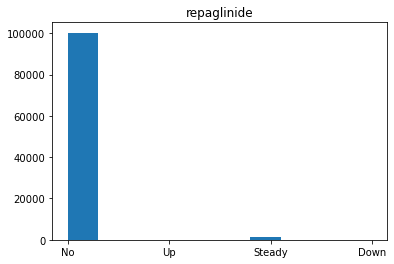

(array([1.01063e+05, 0.00000e+00, 0.00000e+00, 6.68000e+02, 0.00000e+00,
        0.00000e+00, 1.10000e+01, 0.00000e+00, 0.00000e+00, 2.40000e+01]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'nateglinide')

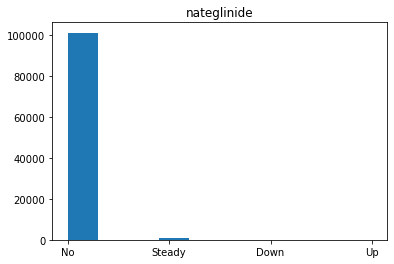

(array([1.0168e+05, 0.0000e+00, 0.0000e+00, 7.9000e+01, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'chlorpropamide')

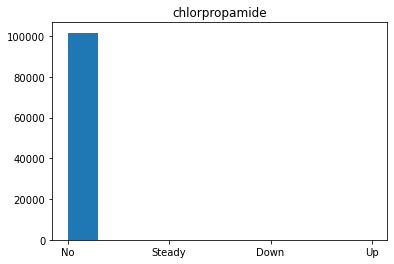

(array([96575.,     0.,     0.,  4670.,     0.,     0.,   194.,     0.,
            0.,   327.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'glimepiride')

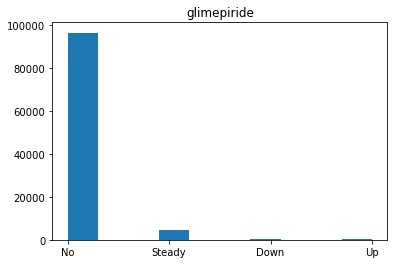

(array([1.01765e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'acetohexamide')

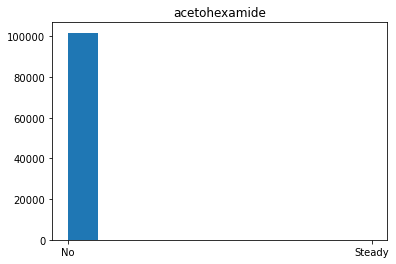

(array([89080.,     0.,     0., 11356.,     0.,     0.,   770.,     0.,
            0.,   560.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'glipizide')

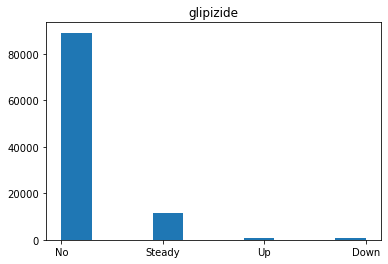

(array([91116.,     0.,     0.,  9274.,     0.,     0.,   812.,     0.,
            0.,   564.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'glyburide')

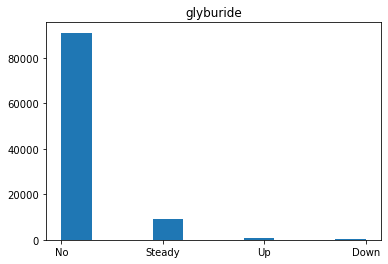

(array([1.01743e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.30000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'tolbutamide')

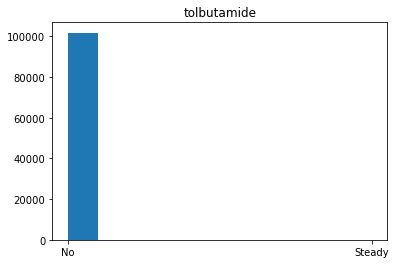

(array([94438.,     0.,     0.,  6976.,     0.,     0.,   234.,     0.,
            0.,   118.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'pioglitazone')

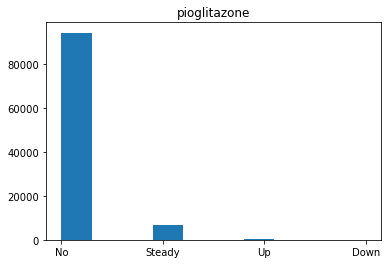

(array([9.5401e+04, 0.0000e+00, 0.0000e+00, 6.1000e+03, 0.0000e+00,
        0.0000e+00, 1.7800e+02, 0.0000e+00, 0.0000e+00, 8.7000e+01]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'rosiglitazone')

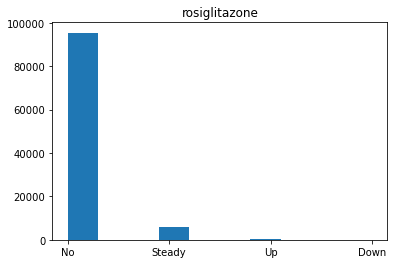

(array([1.01458e+05, 0.00000e+00, 0.00000e+00, 2.95000e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+01, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'acarbose')

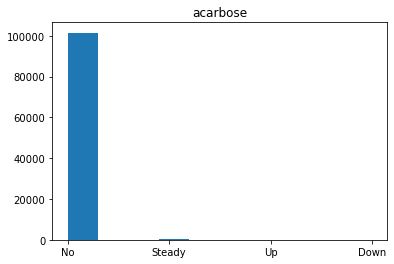

(array([1.01728e+05, 0.00000e+00, 0.00000e+00, 3.10000e+01, 0.00000e+00,
        0.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'miglitol')

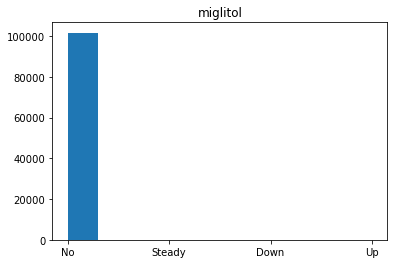

(array([1.01763e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'troglitazone')

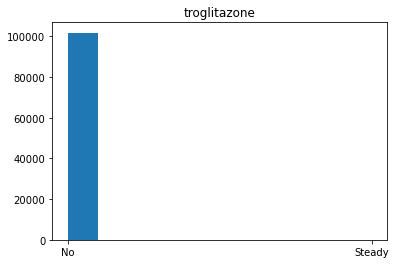

(array([1.01727e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'tolazamide')

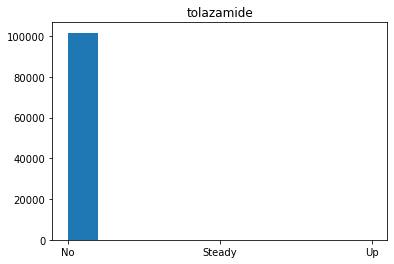

(array([     0.,      0.,      0.,      0.,      0., 101766.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'examide')

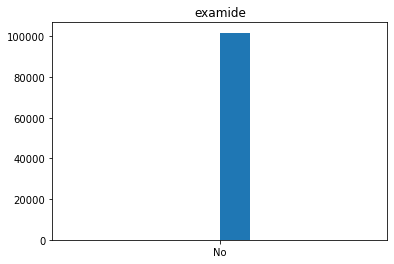

(array([     0.,      0.,      0.,      0.,      0., 101766.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'citoglipton')

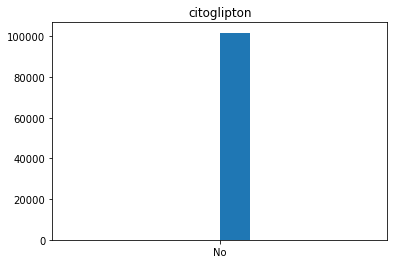

(array([47383.,     0.,     0., 11316.,     0.,     0., 30849.,     0.,
            0., 12218.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'insulin')

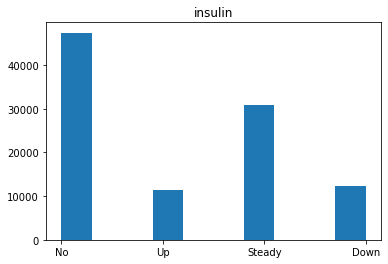

(array([1.0106e+05, 0.0000e+00, 0.0000e+00, 6.9200e+02, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'glyburide-metformin')

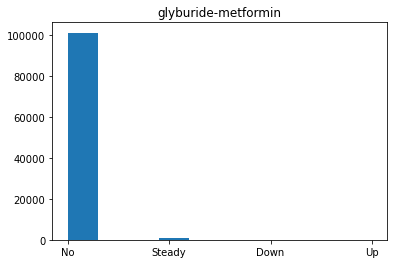

(array([1.01753e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.30000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'glipizide-metformin')

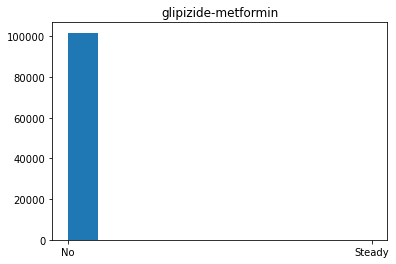

(array([1.01765e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'glimepiride-pioglitazone')

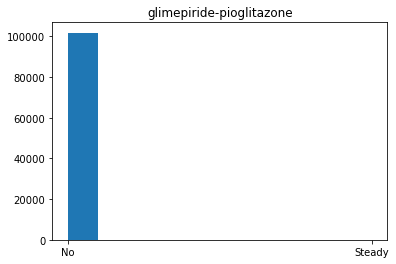

(array([1.01764e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'metformin-rosiglitazone')

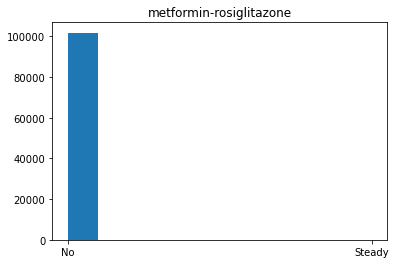

(array([1.01765e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'metformin-pioglitazone')

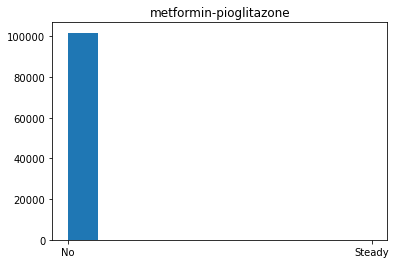

(array([54755.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 47011.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'change')

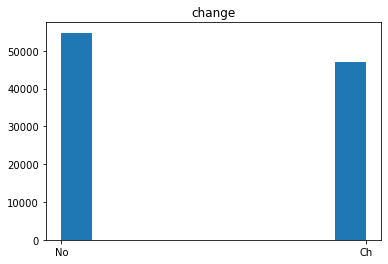

(array([23403.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 78363.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'diabetesMed')

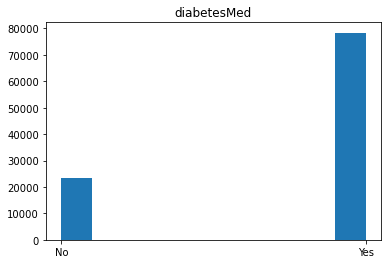

(array([54864.,     0.,     0.,     0.,     0., 35545.,     0.,     0.,
            0., 11357.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'readmitted')

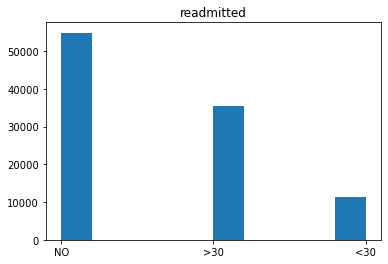

In [47]:
# Distribution of Data
for i in diabetic.columns:
    plt.hist(diabetic[i])
    plt.title(i)
    plt.show()

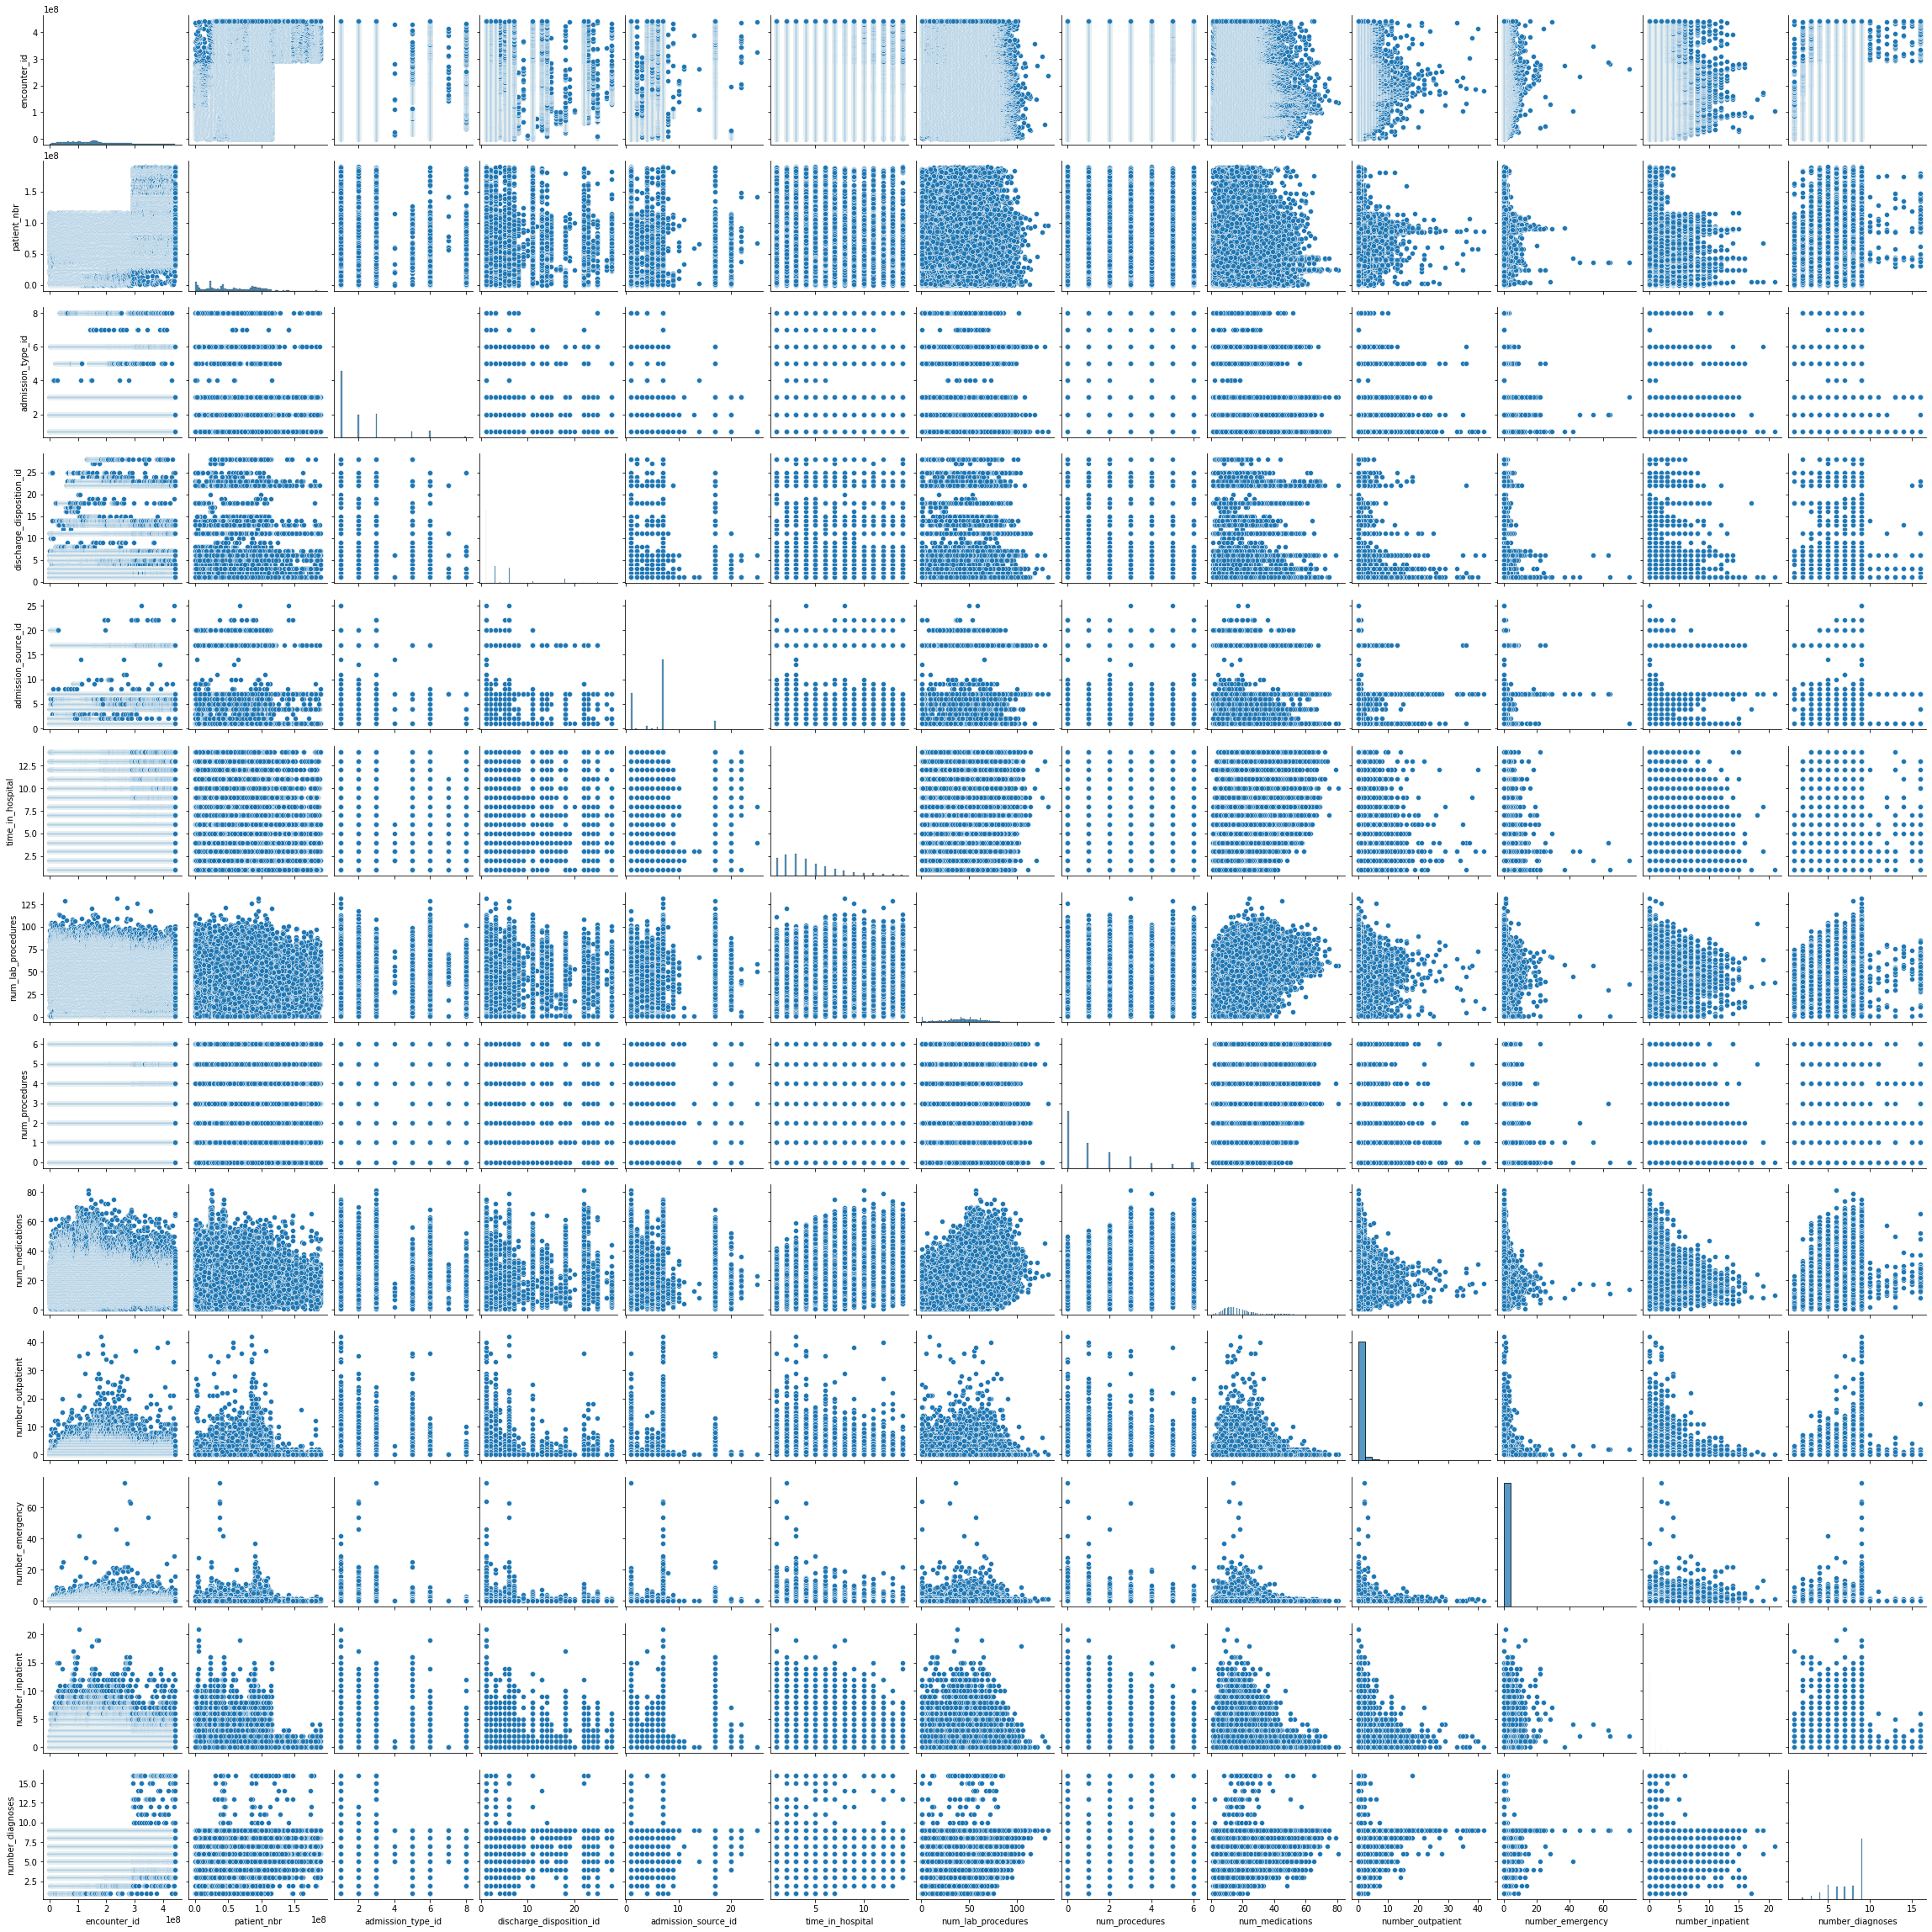

In [48]:
# Pairplot
sns.pairplot(diabetic)

In [60]:
# Test Coor
# Coorelation
correlated_features = set()

correlation_matrix = diabetic.corr()

coor_Delete = .90
corList = []
for i in range(len(correlation_matrix.columns)):
#     print("I", i) 
    for j in range(i):
#         print("J", j) 
#             print("Val", abs(correlation_matrix.iloc[i, j])
        if abs(correlation_matrix.iloc[i, j]) > coor_Delete: 
            val= abs(correlation_matrix.iloc[i, j])
            colname = correlation_matrix.columns[i]
            corList.append({
                "colum_Name": colname, 
                "value_Corr": val})
            correlated_features.add(colname)

print("Number of Highly Correlated Features", len(correlated_features))
correlated_features

# X.drop(labels=correlated_features, axis=1, inplace=True)

Number of Highly Correlated Features 0


set()

In [6]:
# Testing With KNN for Nan - Run this or Other

In [7]:
# diabetic.head()
dia = diabetic.copy()

# Setup Y
dia['readmitted_MC'] = np.where(dia['readmitted'] == 'NO', 0, dia['readmitted']) # Lots of Data in Unknown
dia['readmitted_MC'] = np.where(dia['readmitted'] == '>30', 1, dia['readmitted_MC']) # Lots of Data in Unknown
dia['readmitted_MC'] = np.where(dia['readmitted'] == '<30', 2, dia['readmitted_MC']) # Lots of Data in Unknown
dia['readmitted'] = np.where(dia['readmitted'] == 'NO', 0, dia['readmitted']) # Lots of Data in Unknown
dia['readmitted'] = np.where(dia['readmitted'] == '>30', 0, dia['readmitted']) # Lots of Data in Unknown
dia['readmitted'] = np.where(dia['readmitted'] == '<30', 1, dia['readmitted']) # Lots of Data in Unknown

# Set as NAN for KNN Instead of Deleting Below - Clean up Fields for Catagorical 
dia['race'] = np.where(dia['race'] == '?',np.nan, dia['race'])
dia['race'] = np.where(dia['race'] == 'Other',np.nan, dia['race'])
dia['gender'] = np.where(dia['gender'] == 'Unknown/Invalid', np.nan, dia['gender'])
dia['admission_type_id'] = np.where(dia['admission_type_id'] == 6, np.nan, dia['admission_type_id']) # Lots of Data in Unknown
dia['discharge_disposition_id'] = np.where(dia['discharge_disposition_id'] == 11, np.nan, dia['discharge_disposition_id']) # Lots of Data in Unknown
dia['discharge_disposition_id'] = np.where(dia['discharge_disposition_id'] == 18, np.nan, dia['discharge_disposition_id']) # Lots of Data in Unknown
dia['discharge_disposition_id'] = np.where(dia['discharge_disposition_id'] == 25, np.nan, dia['discharge_disposition_id']) # Lots of Data in Unknown
dia['discharge_disposition_id'] = np.where(dia['discharge_disposition_id'] == 26, np.nan, dia['discharge_disposition_id']) # Lots of Data in Unknown
dia['admission_source_id'] = np.where(dia['admission_source_id'] == 15, np.nan, dia['admission_source_id']) # Lots of Data in Unknown
dia['admission_source_id'] = np.where(dia['admission_source_id'] == 17, np.nan, dia['admission_source_id']) # Lots of Data in Unknown
dia['admission_source_id'] = np.where(dia['admission_source_id'] == 20, np.nan, dia['admission_source_id']) # Lots of Data in Unknown

# Fix Formatting
dia['age'] = np.where(dia['age'] == '[0-10)'  , '10' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[10-20)' , '20' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[20-30)' , '30' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[30-40)' , '40' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[40-50)' , '50' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[50-60)' , '60' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[60-70)' , '70' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[70-80)' , '80' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[80-90)' , '90' , dia['age']) # Lots of Data in Unknown
dia['age'] = np.where(dia['age'] == '[90-100)', '100', dia['age']) # Lots of Data in Unknown
dia['max_glu_serum'] = np.where(dia['max_glu_serum'] == '>200', 'greater200', dia['max_glu_serum']) # Lots of Data in Unknown
dia['max_glu_serum'] = np.where(dia['max_glu_serum'] == '>300', 'greater300', dia['max_glu_serum']) # Lots of Data in Unknown
dia['A1Cresult'] = np.where(dia['A1Cresult'] == '>7', 'greater7', dia['A1Cresult']) # Lots of Data in Unknown
dia['A1Cresult'] = np.where(dia['A1Cresult'] == '>8', 'greater8', dia['A1Cresult']) # Lots of Data in Unknown


# Drop Columnns
dia = dia.drop(['weight' ], axis=1) # Gives no context to Height/Weight
dia = dia.drop(['payer_code', 'medical_specialty'], axis=1) # Payer Code & Doctor Specialy Shouldn't Matter on Treatment - Could Pull Back
dia = dia.drop(['acetohexamide', ], axis=1) # Only 1 No - Yes Otherwise
dia = dia.drop(['tolbutamide', ], axis=1) # Only 23 No - Yes Otherwise
dia = dia.drop(['miglitol', ], axis=1) # Only 39 No - Yes Otherwise
dia = dia.drop(['troglitazone', ], axis=1) # Only 39 No - Yes Otherwise
dia = dia.drop(['tolazamide', ], axis=1) # Only 39 No - Yes Otherwise
dia = dia.drop(['examide','citoglipton' ], axis=1) # All Answers are Yes
dia = dia.drop(['glipizide-metformin' ], axis=1) # Only 13 No - Yes Otherwise
dia = dia.drop(['glimepiride-pioglitazone' ], axis=1) # Only 1 No - Yes Otherwise
dia = dia.drop(['metformin-rosiglitazone' ], axis=1) # Only 2 No - Yes Otherwise
dia = dia.drop(['metformin-pioglitazone' ], axis=1) # Only 1 No - Yes Otherwise
dropped_Values = 14 # Manual

# Assign Catagorical Data
dia_catagorical = ['race', 'gender', 'age','admission_type_id', 
                   'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3',
                   'max_glu_serum', 'A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
                   'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                   'insulin', 'glyburide-metformin', 'change', 'diabetesMed']
print("\nCatagorical", dia_catagorical)
len(dia_catagorical)
# Assign Discret Data
# Removed Patient Number
dia_discrete = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                   'num_medications', 'number_outpatient', 'number_emergency', 
                   'number_inpatient', 'number_diagnoses', ]
print("\nDiscrete", dia_discrete )
len(dia_discrete)

# Investigate Fields
dia_Investigate = ['weight',]
# dia.weight.value_counts()
print("\nInvestigate", dia_Investigate)


# Reconcile Features to Ensure all have been Captured
diabetic.shape[1] - len(dia_catagorical) - len(dia_discrete) - dropped_Values - 1 # 1 is for the Index AND 1 is for the TARGET readmitted


Catagorical ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']


25


Discrete ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


8


Investigate ['weight']


2

In [69]:
dia.shape

(101766, 29)

In [1]:
#  From Dr. Drew Machine Learning 1 Class
def exclude_high_freq(X_df: pd.DataFrame, freq_pct=.9, verbose=False):
    """Dataset that excludes high-frequent fields"""
    result = []
    for col in X_df.columns:
        df = X_df[col].value_counts().reset_index()
        df.columns = ["value", "ct"]
        df["Column"] = col
        df["pct"] = df.ct / len(X_df)
        result.append(df.head(5))

    df_agg = pd.concat(result, axis=0).groupby(["Column"])["pct"].max()

    cols_to_delete = df_agg[df_agg > freq_pct].index.values.tolist()
   
    if verbose:
        print("Columns we will delete:")
        df = pd.concat(result, axis=0)
        df["val-count"] = df["value"].astype(str) + " (" + round(df.pct,2).astype(str) + ")"
        display(df[df["Column"].isin(cols_to_delete)].groupby(["Column"])["val-count"].apply(list))
   
    X_df = X_df.drop(cols_to_delete, axis=1).copy()

       
    return X_df

diabetic_X = exclude_high_freq(dia, verbose=True)

print(diabetic_X.shape)

NameError: name 'pd' is not defined

In [9]:
# Review Data Fields Again to Verify
dia = diabetic_X.copy()
for columns in dia:
    dia[columns].value_counts()

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Asian                641
Name: race, dtype: int64

Female    54708
Male      47055
Name: gender, dtype: int64

80     26068
70     22483
60     17256
90     17197
50      9685
40      3775
100     2793
30      1657
20       691
10       161
Name: age, dtype: int64

1.0    53990
3.0    18869
2.0    18480
5.0     4785
8.0      320
7.0       21
4.0       10
Name: admission_type_id, dtype: int64

1.0     60234
3.0     13954
6.0     12902
2.0      2128
22.0     1993
5.0      1184
4.0       815
7.0       623
23.0      412
13.0      399
14.0      372
28.0      139
8.0       108
15.0       63
24.0       48
9.0        21
17.0       14
16.0       11
19.0        8
10.0        6
27.0        5
12.0        3
20.0        2
Name: discharge_disposition_id, dtype: int64

7.0     57494
1.0     29565
4.0      3187
6.0      2264
2.0      1104
5.0       855
3.0       187
9.0       125
8.0        16
22.0       12
10.0        8
14.0        2
11.0        2
25.0        2
13.0        1
Name: admission_source_id, dtype: int64

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
120       1
132       1
121       1
126       1
118       1
Name: num_lab_procedures, Length: 118, dtype: int64

0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: num_procedures, dtype: int64

13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64

0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: number_outpatient, dtype: int64

0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E918       1
46         1
V13        1
E850       1
927        1
Name: diag_2, Length: 749, dtype: int64

250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: diag_3, Length: 790, dtype: int64

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

None        84748
greater8     8216
Norm         4990
greater7     3812
Name: A1Cresult, dtype: int64

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

No    54755
Ch    47011
Name: change, dtype: int64

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

0    90409
1    11357
Name: readmitted, dtype: int64

0    54864
1    35545
2    11357
Name: readmitted_MC, dtype: int64

In [76]:
print("Number of NaN Values Before KNN", dia.isnull().sum().sum())

Number of NaN Values Before KNN 22337


# Impute NAN Values with KNN

In [11]:
dia.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_diagnoses,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,readmitted_MC
0,2278392,8222157,Caucasian,Female,10,NaN,NaN,1.0,1,41,...,1,None,No,No,No,No,No,No,0,0
1,149190,55629189,Caucasian,Female,20,1.0,1.0,7.0,3,59,...,9,None,No,No,No,Up,Ch,Yes,0,1
2,64410,86047875,AfricanAmerican,Female,30,1.0,1.0,7.0,2,11,...,6,None,No,Steady,No,No,No,Yes,0,0
3,500364,82442376,Caucasian,Male,40,1.0,1.0,7.0,2,44,...,7,None,No,No,No,Up,Ch,Yes,0,0
4,16680,42519267,Caucasian,Male,50,1.0,1.0,7.0,1,51,...,5,None,No,Steady,No,Steady,Ch,Yes,0,0


In [12]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# dia = pd.DataFrame(imputer.fit_transform(dia),columns = dia.columns)

# Get Dummies and Join Discrete and Catagorical Datasets

In [13]:
# Reset Index and Copy
dia = dia.reset_index()
dia_DF = dia.copy()

# Delete Rows where Value is only 1
dia_DF = dia_DF.loc[dia.diag_1 != 1]
dia_DF = dia_DF.loc[dia.diag_2 != 1]
dia_DF = dia_DF.loc[dia.diag_3 != 1]


# Convert to Catgorical from Int 64
dia_DF['admission_type_id'] = dia_DF.admission_type_id.astype('object')
dia_DF['discharge_disposition_id'] = dia_DF.discharge_disposition_id.astype('object')
dia_DF['admission_source_id'] = dia_DF.admission_source_id.astype('object')
# Example of Get Dummies


dia_catagorical = ['race','gender','age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                                       'A1Cresult', 'metformin', 'glipizide', 'glyburide',  'insulin', 'change', 'diabetesMed']

# Create Dataframes of Different Data Types
dia_Cat_DF = dia_DF[dia_catagorical]
dia_Disc_DF = dia_DF[dia_discrete]

# Create Dummys of Catagorical Data
dia_Catgorical_DF = pd.get_dummies(dia_Cat_DF, drop_first=True) # This has all the dummies
dia_Catgorical_DF.head().to_csv(r'dia_Catgorical_DF.csv')
# dia_Catgorical_DF.head()

print("Cat Only", dia_Cat_DF.shape)
print("Cat Dummy", dia_Catgorical_DF.shape)
print("Discrete", dia_Disc_DF.shape)

# Scale Discret Data
scaler = StandardScaler()
dia_Disc_DF_Scaled = scaler.fit_transform(dia_Disc_DF)
dia_Disc_DF_Scaled = pd.DataFrame(dia_Disc_DF_Scaled, columns = dia_Disc_DF.columns)
print("Scaled Discete", dia_Disc_DF_Scaled.shape)
# dia_Disc_DF_Scaled.head()


# diabetes_DF = dia_Disc_DF_Scaled.join(dia_Catgorical_DF) 
# diabetes_DF = pd.concat([dia_Disc_DF_Scaled, dia_Catgorical_DF])
diabetes_DF = pd.merge(dia_Disc_DF_Scaled, dia_Catgorical_DF, left_index=True, right_index=True)
diabetes_DF['readmitted'] = dia_DF['readmitted'] # ADD Y
diabetes_DF['readmitted_MC'] = dia_DF['readmitted_MC']

print("Final Diabetes Merge", diabetes_DF.shape)
diabetes_DF.head().to_csv(r'diabetes_DF.csv')
# diabetes_DF.head()

Cat Only (101766, 13)
Cat Dummy (101766, 72)
Discrete (101766, 8)
Scaled Discete (101766, 8)
Final Diabetes Merge (101766, 82)


In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
diabetes_DF = pd.DataFrame(imputer.fit_transform(diabetes_DF),columns = diabetes_DF.columns)

In [77]:
diabetes_DF.isnull().sum()
print("Number of NaN Values After KNN", diabetes_DF.isnull().sum().sum())

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
                     ..
insulin_Up            0
change_No             0
diabetesMed_Yes       0
readmitted            0
readmitted_MC         0
Length: 82, dtype: int64

Number of NaN Values After KNN 0


In [16]:
# Review Data Fields Again to Verify
for columns in diabetes_DF:
    diabetes_DF[columns].value_counts()

-0.467653    17756
-0.802651    17224
-1.137649    14208
-0.132655    13924
 0.202343     9966
 0.537341     7539
 0.872339     5859
 1.207337     4391
 1.542335     3002
 1.877333     2342
 2.212331     1855
 2.547329     1448
 2.882327     1210
 3.217324     1042
Name: time_in_hospital, dtype: int64

-2.139630    3208
-0.004861    2804
 0.045967    2496
 0.096794    2376
-0.259000    2213
             ... 
 3.908881       1
 4.518815       1
 3.959709       1
 4.213848       1
 3.807225       1
Name: num_lab_procedures, Length: 118, dtype: int64

-0.785398    46652
-0.199162    20742
 0.387074    12717
 0.973309     9443
 2.732016     4954
 1.559545     4180
 2.145781     3078
Name: num_procedures, dtype: int64

-0.371804    6086
-0.494842    6004
-0.617881    5795
-0.125726    5792
-0.248765    5707
             ... 
 6.641400       2
 7.256594       2
 7.994826       1
 7.748748       1
 7.133555       1
Name: num_medications, Length: 75, dtype: int64

-0.291461     85027
 0.497643      8547
 1.286748      3594
 2.075853      2042
 2.864958      1099
 3.654062       533
 4.443167       303
 5.232272       155
 6.021377        98
 6.810481        83
 7.599586        57
 8.388691        42
 9.966900        31
 9.177796        30
 10.756005       28
 11.545110       20
 12.334215       15
 13.123319        8
 16.279738        7
 15.490634        7
 13.912424        5
 17.068843        5
 14.701529        3
 21.014367        3
 18.647053        3
 20.225262        2
 17.857948        2
 19.436157        2
 25.748995        2
 27.327205        2
 28.116310        2
 22.592576        2
 26.538100        1
 30.483624        1
 32.850938        1
 21.803472        1
 28.905414        1
 29.694519        1
 31.272729        1
Name: number_outpatient, dtype: int64

-0.212620     90383
 0.862108      7677
 1.936836      2042
 3.011565       725
 4.086293       374
 5.161021       192
 6.235750        94
 7.310478        73
 8.385207        50
 10.534663       34
 9.459935        33
 11.609392       23
 13.758848       12
 12.684120       10
 23.431403        6
 16.983033        5
 19.132490        5
 20.207218        4
 21.281947        4
 15.908305        3
 14.833577        3
 26.655588        2
 22.356675        2
 29.879773        1
 44.925970        1
 49.224883        1
 81.466733        1
 39.552328        1
 68.569993        1
 67.495265        1
 57.822710        1
 25.580860        1
 30.954502        1
Name: number_emergency, dtype: int64

-0.503276     67630
 0.288579     19521
 1.080434      7566
 1.872290      3411
 2.664145      1622
 3.456000       812
 4.247855       480
 5.039710       268
 5.831566       151
 6.623421       111
 7.415276        61
 8.207131        49
 8.998987        34
 9.790842        20
 10.582697       10
 11.374552        9
 12.166408        6
 14.541973        2
 12.958263        1
 16.125684        1
 13.750118        1
Name: number_inpatient, dtype: int64

 0.815784    49474
-1.252906    11393
 0.298612    10616
-0.218561    10393
-0.735733    10161
-1.770078     5537
-2.287251     2835
-2.804423     1023
-3.321596      219
 4.435992       45
 1.332957       17
 2.884475       16
 1.850130       11
 3.918820       10
 2.367302        9
 3.401647        7
Name: number_diagnoses, dtype: int64

0.0    101125
1.0       641
Name: race_Asian, dtype: int64

1.0    76099
0.0    25667
Name: race_Caucasian, dtype: int64

0.0    99729
1.0     2037
Name: race_Hispanic, dtype: int64

0.0    54711
1.0    47055
Name: gender_Male, dtype: int64

0.0    98973
1.0     2793
Name: age_100, dtype: int64

0.0    101075
1.0       691
Name: age_20, dtype: int64

0.0    100109
1.0      1657
Name: age_30, dtype: int64

0.0    97991
1.0     3775
Name: age_40, dtype: int64

0.0    92081
1.0     9685
Name: age_50, dtype: int64

0.0    84510
1.0    17256
Name: age_60, dtype: int64

0.0    79283
1.0    22483
Name: age_70, dtype: int64

0.0    75698
1.0    26068
Name: age_80, dtype: int64

0.0    84569
1.0    17197
Name: age_90, dtype: int64

0.0    83286
1.0    18480
Name: admission_type_id_2.0, dtype: int64

0.0    82897
1.0    18869
Name: admission_type_id_3.0, dtype: int64

0.0    101756
1.0        10
Name: admission_type_id_4.0, dtype: int64

0.0    96981
1.0     4785
Name: admission_type_id_5.0, dtype: int64

0.0    101745
1.0        21
Name: admission_type_id_7.0, dtype: int64

0.0    101446
1.0       320
Name: admission_type_id_8.0, dtype: int64

0.0    99638
1.0     2128
Name: discharge_disposition_id_2.0, dtype: int64

0.0    87812
1.0    13954
Name: discharge_disposition_id_3.0, dtype: int64

0.0    100951
1.0       815
Name: discharge_disposition_id_4.0, dtype: int64

0.0    100582
1.0      1184
Name: discharge_disposition_id_5.0, dtype: int64

0.0    88864
1.0    12902
Name: discharge_disposition_id_6.0, dtype: int64

0.0    101143
1.0       623
Name: discharge_disposition_id_7.0, dtype: int64

0.0    101658
1.0       108
Name: discharge_disposition_id_8.0, dtype: int64

0.0    101745
1.0        21
Name: discharge_disposition_id_9.0, dtype: int64

0.0    101760
1.0         6
Name: discharge_disposition_id_10.0, dtype: int64

0.0    101763
1.0         3
Name: discharge_disposition_id_12.0, dtype: int64

0.0    101367
1.0       399
Name: discharge_disposition_id_13.0, dtype: int64

0.0    101394
1.0       372
Name: discharge_disposition_id_14.0, dtype: int64

0.0    101703
1.0        63
Name: discharge_disposition_id_15.0, dtype: int64

0.0    101755
1.0        11
Name: discharge_disposition_id_16.0, dtype: int64

0.0    101752
1.0        14
Name: discharge_disposition_id_17.0, dtype: int64

0.0    101758
1.0         8
Name: discharge_disposition_id_19.0, dtype: int64

0.0    101764
1.0         2
Name: discharge_disposition_id_20.0, dtype: int64

0.0    99773
1.0     1993
Name: discharge_disposition_id_22.0, dtype: int64

0.0    101354
1.0       412
Name: discharge_disposition_id_23.0, dtype: int64

0.0    101718
1.0        48
Name: discharge_disposition_id_24.0, dtype: int64

0.0    101761
1.0         5
Name: discharge_disposition_id_27.0, dtype: int64

0.0    101627
1.0       139
Name: discharge_disposition_id_28.0, dtype: int64

0.0    100662
1.0      1104
Name: admission_source_id_2.0, dtype: int64

0.0    101579
1.0       187
Name: admission_source_id_3.0, dtype: int64

0.0    98579
1.0     3187
Name: admission_source_id_4.0, dtype: int64

0.0    100911
1.0       855
Name: admission_source_id_5.0, dtype: int64

0.0    99502
1.0     2264
Name: admission_source_id_6.0, dtype: int64

1.0    57494
0.0    44272
Name: admission_source_id_7.0, dtype: int64

0.0    101750
1.0        16
Name: admission_source_id_8.0, dtype: int64

0.0    101641
1.0       125
Name: admission_source_id_9.0, dtype: int64

0.0    101758
1.0         8
Name: admission_source_id_10.0, dtype: int64

0.0    101764
1.0         2
Name: admission_source_id_11.0, dtype: int64

0.0    101765
1.0         1
Name: admission_source_id_13.0, dtype: int64

0.0    101764
1.0         2
Name: admission_source_id_14.0, dtype: int64

0.0    101754
1.0        12
Name: admission_source_id_22.0, dtype: int64

0.0    101764
1.0         2
Name: admission_source_id_25.0, dtype: int64

0.0    96776
1.0     4990
Name: A1Cresult_Norm, dtype: int64

0.0    97954
1.0     3812
Name: A1Cresult_greater7, dtype: int64

0.0    93550
1.0     8216
Name: A1Cresult_greater8, dtype: int64

1.0    81778
0.0    19988
Name: metformin_No, dtype: int64

0.0    83420
1.0    18346
Name: metformin_Steady, dtype: int64

0.0    100699
1.0      1067
Name: metformin_Up, dtype: int64

1.0    89080
0.0    12686
Name: glipizide_No, dtype: int64

0.0    90410
1.0    11356
Name: glipizide_Steady, dtype: int64

0.0    100996
1.0       770
Name: glipizide_Up, dtype: int64

1.0    91116
0.0    10650
Name: glyburide_No, dtype: int64

0.0    92492
1.0     9274
Name: glyburide_Steady, dtype: int64

0.0    100954
1.0       812
Name: glyburide_Up, dtype: int64

0.0    54383
1.0    47383
Name: insulin_No, dtype: int64

0.0    70917
1.0    30849
Name: insulin_Steady, dtype: int64

0.0    90450
1.0    11316
Name: insulin_Up, dtype: int64

1.0    54755
0.0    47011
Name: change_No, dtype: int64

1.0    78363
0.0    23403
Name: diabetesMed_Yes, dtype: int64

0.0    90409
1.0    11357
Name: readmitted, dtype: int64

0.0    54864
1.0    35545
2.0    11357
Name: readmitted_MC, dtype: int64

# Create Target and Target Multiclass Variables

In [17]:
diabetes_DF.readmitted_MC.value_counts()
diabetes_DF.readmitted.value_counts()

y_MC = diabetes_DF['readmitted_MC']
y_MC = y_MC.astype('int')
len(y_MC)


0.0    54864
1.0    35545
2.0    11357
Name: readmitted_MC, dtype: int64

0.0    90409
1.0    11357
Name: readmitted, dtype: int64

101766

In [18]:
# Create Variables
X = diabetes_DF
X = X.drop(['readmitted', 'readmitted_MC'], axis=1)
y = diabetes_DF['readmitted']
y = y.astype('int')

In [19]:
print(X.shape)
len(y)

(101766, 80)


101766

# Check For Correlation

In [20]:
# Coorelation
correlated_features = set()
correlation_matrix = X.corr()

In [21]:
coor_Delete = .95
corList = []
for i in range(len(correlation_matrix.columns)):
#     print("I", i) 
    for j in range(i):
#         print("J", j) 
#             print("Val", abs(correlation_matrix.iloc[i, j])
        if abs(correlation_matrix.iloc[i, j]) > coor_Delete: 
            val= abs(correlation_matrix.iloc[i, j])
            colname = correlation_matrix.columns[i]
            corList.append({
                "colum_Name": colname, 
                "value_Corr": val})
            correlated_features.add(colname)

In [22]:
print(len(correlated_features))
correlated_features

0


set()

In [23]:
# Drop correlated_features
X.drop(labels=correlated_features, axis=1, inplace=True)

# Model Development - Single Class

In [24]:
# With Scaled - Prediction with 2 Target - No Multiclass
lr = LogisticRegression(max_iter=10000, random_state=447788)
lr_CVS = cross_val_score(lr, X, y, scoring='accuracy', error_score="raise", n_jobs=-1)
lr_CVS
np.save("pickle/lr_CVS.npy", lr_CVS)

# array([0.88468515, 0.88852034, 0.88753563, 0.88846852, 0.8874838 ])
# array([0.88847401, 0.88876333, 0.88802634, 0.8884194 , 0.8881246 ])
# array([0.88847401, 0.88876333, 0.88802634, 0.8884194 , 0.8881246 ])

array([0.88793358, 0.88881246, 0.88822287, 0.88817373, 0.88822287])

In [25]:
C = np.array([.01, .1, .2, .25, .50, .75, .99])
c_result = []
for i in C:
    lr.C = i
    out = cross_val_score(lr, X, y, scoring='accuracy', n_jobs=-1,)
    print(i, out.mean(),out.std())
    c_result.append({
        'C': i,
        'Mean': out.mean(),
        'STD': out.std()
    })

c_Value_DF_Man = pd.DataFrame(c_result)
c_Value_DF_Man.to_csv('pickle/c_Value_DF_Man.csv')
display(c_Value_DF_Man)  
    


0.01 0.8882927540466239 0.0004211266292960513
0.1 0.888273100924234 0.0003907316827958214
0.2 0.8882534473190615 0.0003242249782281585
0.25 0.8882239676354766 0.0003293476105200096
0.5 0.8882436207578666 0.0003136625379658498
0.75 0.8882436207578666 0.0003010968005970683
0.99 0.8882632738802563 0.00031482279625503725


,C,Mean,STD
0,0.01,0.888293,0.000421
1,0.10,0.888273,0.000391
2,0.20,0.888253,0.000324
3,0.25,0.888224,0.000329
4,0.50,0.888244,0.000314
5,0.75,0.888244,0.000301
6,0.99,0.888263,0.000315


In [26]:
C = np.logspace(-4, 4, num=5, base=10.0, dtype=None, axis=0)
for i in C:
    lr.C = i
    out = cross_val_score(lr, X, y, scoring='accuracy', n_jobs=-1)
    print(out.mean(), out.std(), i)
    c_result.append({
        'C': i,
        'Mean': out.mean(),
        'STD': out.std()
    })

c_Value_DF_NP4 = pd.DataFrame(c_result)
c_Value_DF_NP4.to_csv('pickle/c_Value_DF_NP4.csv')
display(c_Value_DF_NP4)  


0.8883910138651794 9.209441829370736e-05 0.0001
0.8882927540466239 0.0004211266292960513 0.01
0.8882731004414512 0.0002902090789831509 1.0
0.8882632738802565 0.0002942115283305479 100.0
0.8882534473190615 0.00027595913652544345 10000.0


,C,Mean,STD
0,0.0100,0.888293,0.000421
1,0.1000,0.888273,0.000391
2,0.2000,0.888253,0.000324
3,0.2500,0.888224,0.000329
4,0.5000,0.888244,0.000314
5,0.7500,0.888244,0.000301
6,0.9900,0.888263,0.000315
7,0.0001,0.888391,0.000092
8,0.0100,0.888293,0.000421
9,1.0000,0.888273,0.000290


In [27]:
lr = LogisticRegression(max_iter=10000, C=.0001)
preds = cross_val_predict(lr, X, y, n_jobs=-1)
preds
np.save("pickle/preds.npy", preds)

array([0, 0, 0, ..., 0, 0, 0])

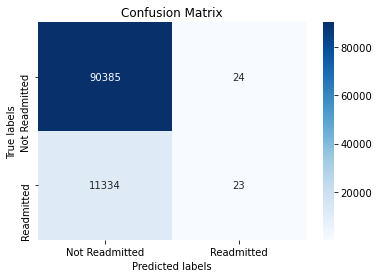

In [101]:
ax= plt.subplot()

cm0 = confusion_matrix(y, preds)
sns.heatmap(cm0, cmap="Blues", annot=True, fmt='d', ) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Readmitted', 'Readmitted']); ax.yaxis.set_ticklabels(['Not Readmitted', 'Readmitted']);


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y, preds, target_names=['Not Readmitted', 'Readmitted']))


                precision    recall  f1-score   support

Not Readmitted       0.89      1.00      0.94     90409
    Readmitted       0.49      0.00      0.00     11357

      accuracy                           0.89    101766
     macro avg       0.69      0.50      0.47    101766
  weighted avg       0.84      0.89      0.84    101766



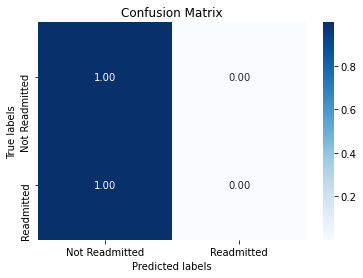

In [100]:
ax= plt.subplot()

cm_N = confusion_matrix(y, preds, normalize='true') # Percentages
sns.heatmap(cm_N, cmap="Blues", annot=True, fmt='.2f')


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Readmitted', 'Readmitted']); ax.yaxis.set_ticklabels(['Not Readmitted', 'Readmitted']);



In [31]:
# One Vs Rest Model
# precision

In [32]:
# Multiclass Logistic Regression with One Vs Rest
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(max_iter=10000, solver='liblinear' , n_jobs=-1, random_state=447789))
# clf = OneVsRestClassifier(LogisticRegression(max_iter=10000, n_jobs=-1)).fit(X, y_MC)

In [33]:
cvs_MC = cross_val_score(clf, X, y_MC, scoring='accuracy', n_jobs=-1)
cvs_MC
np.save("pickle/cvs_MC.npy", cvs_MC)

array([0.55841604, 0.56600992, 0.55795214, 0.57996364, 0.58733356])

In [34]:
# C doesn't work for Multiclass
# C = np.logspace(-9, 1, num=10, base=10.0, dtype=None, axis=0)
C = np.logspace(-4, 4, num=5, base=10.0, dtype=None, axis=0)
c_result = []
for i in C:
    clf.C = i
    out = cross_val_score(clf, X, y_MC, scoring='accuracy', n_jobs=-1)
    print(i, out.mean(),out.std())
    c_result.append({
        'C': i,
        'Mean': out.mean(),
        'STD': out.std()
    })

c_Value_DF_REST = pd.DataFrame(c_result)
c_Value_DF_REST.to_csv('pickle/c_Value_DF_REST.csv')
display(c_Value_DF_REST)  


0.0001 0.5699350619954193 0.011789530961908445
0.01 0.5699350619954193 0.011789530961908445
1.0 0.5699350619954193 0.011789530961908445
100.0 0.5699350619954193 0.011789530961908445
10000.0 0.5699350619954193 0.011789530961908445


,C,Mean,STD
0,0.0001,0.569935,0.01179
1,0.0100,0.569935,0.01179
2,1.0000,0.569935,0.01179
3,100.0000,0.569935,0.01179
4,10000.0000,0.569935,0.01179


In [36]:
# clf_New = LogisticRegression(max_iter=10000, multi_class='ovr', solver='liblinear' , n_jobs=-1)
# array([0.56716125, 0.57790006, 0.56158797, 0.57976711, 0.57853879])
clf_New = LogisticRegression(max_iter=10000, multi_class='ovr', n_jobs=-1)
# array([0.56721038, 0.57775267, 0.56153884, 0.57986538, 0.57853879])
model_clf_CVS = cross_val_score(clf_New, X, y_MC, scoring='accuracy', n_jobs=-1)
model_clf_CVS
# model_clf_CVS.save("pickle/model_clf_CVS.npy", cvs_MC)

array([0.55846517, 0.56591166, 0.55780475, 0.58011104, 0.58718616])

In [38]:
preds_MC = cross_val_predict(clf_New, X, y_MC, n_jobs=-1)
# preds_MC.to_csv('preds_MC.csv')
preds_MC
# preds_MC.save("pickle/preds_MC.npy", cvs_MC)

array([0, 0, 0, ..., 1, 1, 0])

In [57]:
preds_MC.c

array([0, 0, 0, ..., 1, 1, 0])

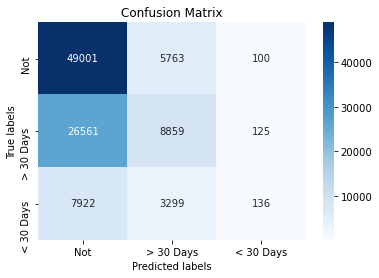

In [98]:
ax= plt.subplot()

cm_MC = confusion_matrix(y_MC, preds_MC)
sns.heatmap(cm_MC, cmap="Blues", annot=True, fmt='d', ax=ax) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not', '> 30 Days', '< 30 Days']); ax.yaxis.set_ticklabels(['Not', '> 30 Days', '< 30 Days']);

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_MC, preds_MC, target_names=['Not Readmitted', 'Readmitted > 30 Days', 'Readmitted < 30 Days']))

                      precision    recall  f1-score   support

      Not Readmitted       0.59      0.89      0.71     54864
Readmitted > 30 Days       0.49      0.25      0.33     35545
Readmitted < 30 Days       0.38      0.01      0.02     11357

            accuracy                           0.57    101766
           macro avg       0.49      0.38      0.35    101766
        weighted avg       0.53      0.57      0.50    101766

